## Imports

In [154]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

# Extração

In [80]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Transformação

In [81]:
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [83]:
df['account.Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [84]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total']

,account.Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [85]:
col_yes_no = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
              'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
              'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
              'internet.StreamingMovies', 'account.PaperlessBilling']
df[col_yes_no] = df[col_yes_no].apply(lambda x: x.replace('Yes', 1).replace('No', 0))
df[col_yes_no] = df[col_yes_no].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   bool   
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   bool   
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   bool   
 11  internet.OnlineBackup      7267 non-null   bool   
 12  internet.DeviceProtection  7267 non-null   bool   
 13  internet.TechSupport       7267 non-null   bool 

/tmp/ipython-input-85-4015199342.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col_yes_no] = df[col_yes_no].apply(lambda x: x.replace('Yes', 1).replace('No', 0))


In [86]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [87]:
df = df.dropna()
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [88]:
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

df['Contas_Diarias']

/tmp/ipython-input-88-33159159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30


,Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [89]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


# Carga e Análise

In [90]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213,2.158514
std,0.3693,24.558067,30.125739,2268.632997,1.004191
min,0.0000,1.000000,18.250000,18.800000,0.608333
25%,0.0000,9.000000,35.450000,400.225000,1.181667
50%,0.0000,29.000000,70.300000,1391.000000,2.343333
75%,0.0000,55.000000,89.900000,3785.300000,2.996667
max,1.0000,72.000000,118.750000,8684.800000,3.958333


## Análises de Evasão


#### Evasão Total

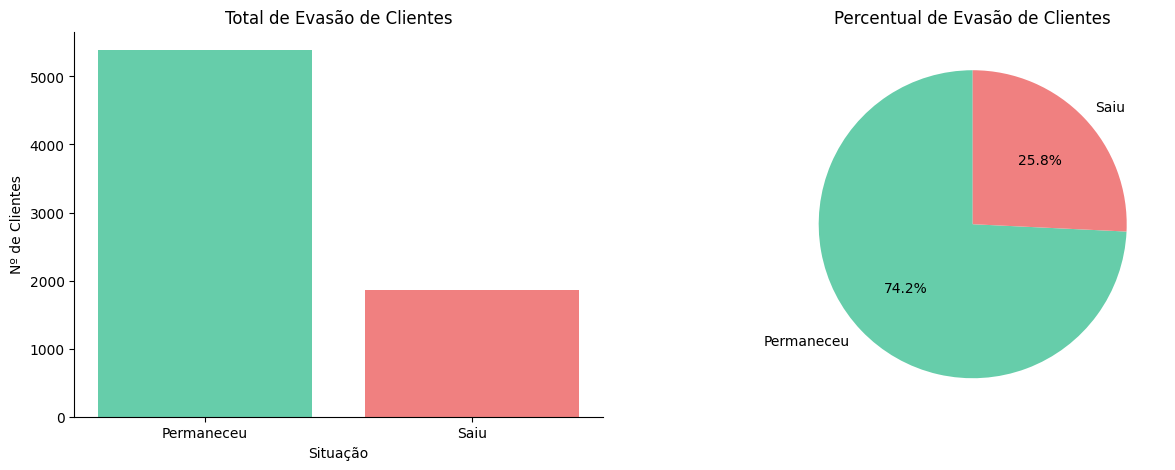

In [91]:
churn_counts = df['Churn'].value_counts()
labels = ['Permaneceu', 'Saiu']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(labels, churn_counts, color=['mediumaquamarine', 'lightcoral'])
axs[0].set_title('Total de Evasão de Clientes')
axs[0].set_xlabel('Situação')
axs[0].set_ylabel('Nº de Clientes')

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['mediumaquamarine', 'lightcoral'], startangle=90)
axs[1].set_title('Percentual de Evasão de Clientes')
axs[1].set_ylabel('')

plt.show()

#### Evasão X Gênero

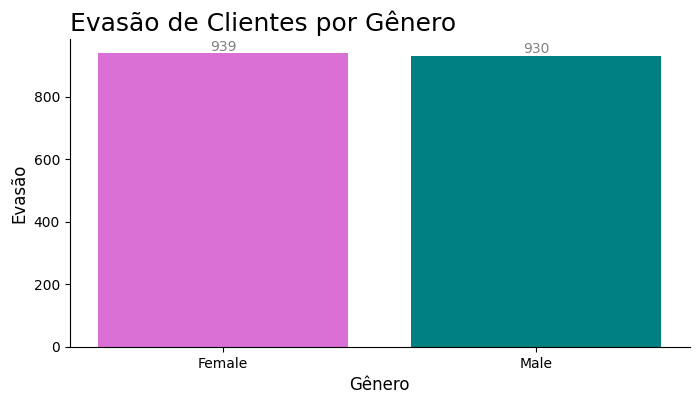

In [97]:
evasao_genero_agrupados = df.groupby('customer.gender')['Churn'].sum()

fig, ax = plt.subplots(figsize=(8,4))

barras = ax.bar(evasao_genero_agrupados.index, evasao_genero_agrupados.values, color=['orchid', 'teal'])

ax.bar_label(barras, color='gray')

ax.set_title('Evasão de Clientes por Gênero', fontsize=18, loc='left')
ax.set_xlabel('Gênero', fontsize=12)
ax.set_ylabel('Evasão', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Evasão X Tipo de Contrato

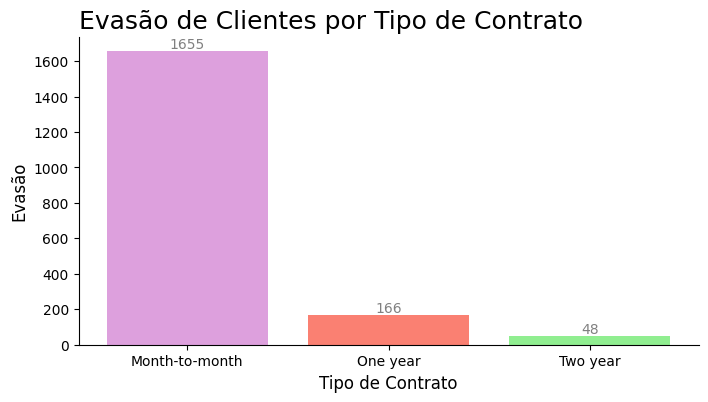

In [121]:
evasao_contrato_agrupados = df.groupby('account.Contract')['Churn'].sum()

fig, ax = plt.subplots(figsize=(8,4))

barras = ax.bar(evasao_contrato_agrupados.index, evasao_contrato_agrupados.values, color=['plum', 'salmon', 'lightgreen'])

ax.bar_label(barras, color='gray')

ax.set_title('Evasão de Clientes por Tipo de Contrato', fontsize=18, loc='left')
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Evasão', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Evasão X Método de Pagamento

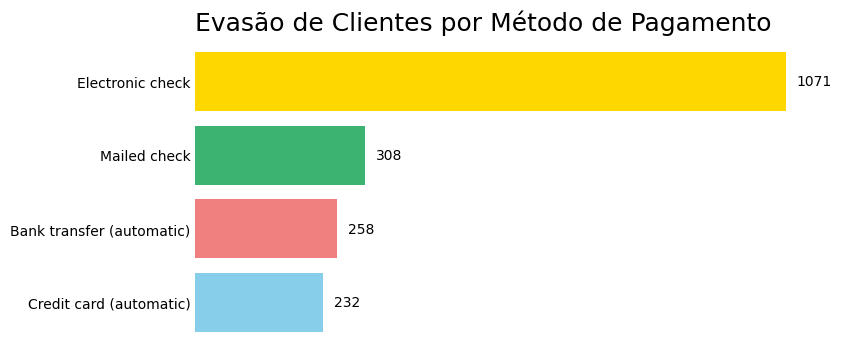

In [127]:
evasao_pagamento_agrupados = df.groupby('account.PaymentMethod')['Churn'].sum()

ordenar_evasao_pagamentos = evasao_pagamento_agrupados.sort_values()

fig, ax = plt.subplots(figsize=(8,4))

ax.barh(ordenar_evasao_pagamentos.index, ordenar_evasao_pagamentos.values, color = ['skyblue', 'lightcoral', 'mediumseagreen', 'gold'])

ax.set_title('Evasão de Clientes por Método de Pagamento', fontsize=18, loc='left')

for i, v in enumerate(ordenar_evasao_pagamentos.values):
  ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

#### Evasão X Tipo de Serviço de Internet

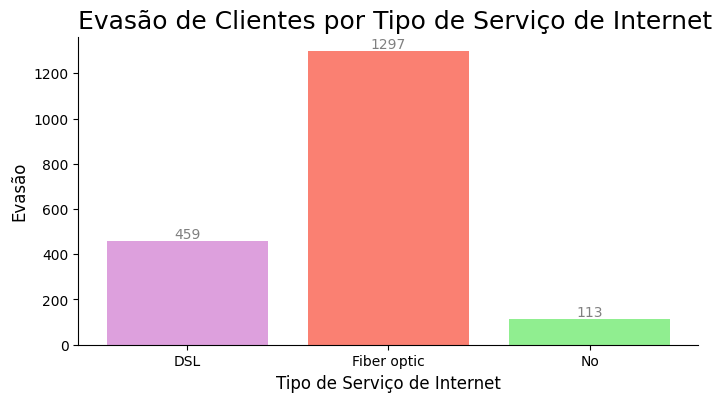

In [128]:
evasao_servico_agrupados = df.groupby('internet.InternetService')['Churn'].sum()

fig, ax = plt.subplots(figsize=(8,4))

barras = ax.bar(evasao_servico_agrupados.index, evasao_servico_agrupados.values, color=['plum', 'salmon', 'lightgreen'])

ax.bar_label(barras, color='gray')

ax.set_title('Evasão de Clientes por Tipo de Serviço de Internet', fontsize=18, loc='left')
ax.set_xlabel('Tipo de Serviço de Internet', fontsize=12)
ax.set_ylabel('Evasão', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Evasão X Tempo de Contrato

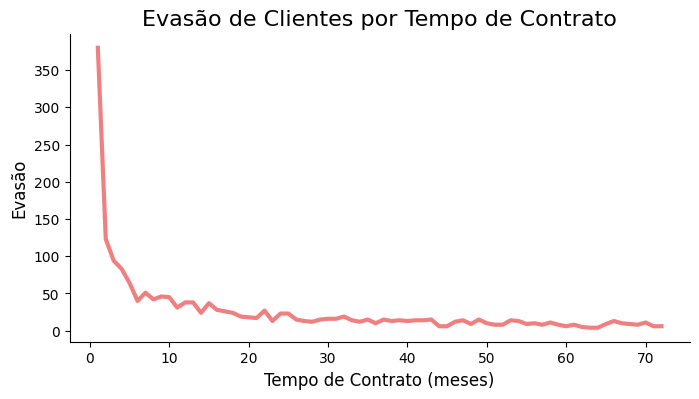

In [147]:
evasao_tempo_agrupados = df.groupby('customer.tenure')['Churn'].sum()

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(evasao_tempo_agrupados.index, evasao_tempo_agrupados.values, color='lightcoral', lw=3)

ax.set_title('Evasão de Clientes por Tempo de Contrato', fontsize=16)
ax.set_xlabel('Tempo de Contrato (meses)', fontsize=12)
ax.set_ylabel('Evasão', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Relatório Final